In [1]:
# data from https://baseballsavant.mlb.com/

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run cleaning_adv_metrics.py

In [3]:
pitchers # .to_csv('pitchers.csv')

,pitcher,k9,h9,bb9,hr9,gb2fb,hc_perc,fbc,osc,o_swing,z_contact,ss_perc,avg_speed
0,647336.0,7.909091,9.818182,3.272727,2.454545,2.090909,38.0,5.067568,3.296703,23.863636,65.934066,9.683426,88.292737
1,663558.0,7.714286,5.625,4.178571,0.482143,1.516129,33.027523,3.216374,3.676471,22.850123,65.014577,15.333333,87.6916
2,607625.0,8.4,8.4,2.16,1.14,1.873786,51.529412,2.764228,2.220851,25.948808,64.790997,9.213294,87.724905
3,621363.0,7.826087,5.478261,3.0,0.521739,1.234043,40.625,3.150912,2.469136,31.392931,67.488789,12.944984,89.720604
4,675916.0,9.957447,4.595745,5.170213,1.148936,0.806452,43.181818,5.811138,0.940439,26.91358,57.926829,10.914052,89.568759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,622065.0,5.113636,5.420455,2.045455,1.022727,2.5625,49.69697,5.157593,4.358068,35.574837,67.788462,14.823261,86.635918
475,676775.0,6.954545,7.363636,1.636364,1.227273,2.807692,52.03252,3.688525,3.203661,32.167832,71.753247,14.141414,91.53569
476,643511.0,6.428571,7.071429,1.821429,0.75,2.553191,34.222222,1.73913,2.140946,29.150579,70.132013,10.676157,77.972865
477,596133.0,7.160584,10.182482,2.627737,1.905109,1.300885,48.04878,3.667482,3.585271,24.887691,68.995633,9.255979,89.433525


In [4]:
pitchers_key = pitchers_full[['player_name', 'pitcher']]
pitchers_key = pitchers_key.drop_duplicates(subset=['player_name', 'pitcher'])
pitchers_key

,player_name,pitcher
0,"Soroka, Michael",647336
537,"Moran, Jovani",663558
1287,"Lugo, Seth",607625
3664,"Poche, Colin",621363
4591,"Karinchak, James",675916
...,...,...
639645,"Young, Alex",622065
640522,"Winn, Keaton",676775
641116,"Rogers, Tyler",643511
642240,"Weaver, Luke",596133


In [5]:
pitchers_full.groupby('events').agg({'release_speed': 'count'}).sort_values(by='release_speed')
pitchers_full

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,away_runs_allowed,home_runs_allowed,runs_allowed
0,FF,2023-09-05,94.3,-2.21,5.88,"Soroka, Michael",575929,647336,strikeout,swinging_strike,...,5,1,NaN,Standard,225.0,0.005,-0.130,0,0,0
1,SL,2023-09-05,83.4,-2.04,6.31,"Soroka, Michael",575929,647336,NaN,foul,...,5,1,NaN,Standard,58.0,0.000,0.000,0,0,0
2,FF,2023-09-05,94.5,-2.31,5.89,"Soroka, Michael",575929,647336,NaN,ball,...,5,1,Standard,Standard,221.0,0.000,0.040,0,0,0
3,SL,2023-09-05,82.8,-2.00,6.34,"Soroka, Michael",575929,647336,NaN,called_strike,...,5,1,Standard,Standard,54.0,0.000,-0.031,0,0,0
4,FF,2023-09-05,92.3,-2.42,5.88,"Soroka, Michael",575929,647336,NaN,ball,...,5,1,Standard,Standard,227.0,0.000,0.021,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645726,FS,2023-03-31,87.9,-1.60,5.86,"McGough, Scott",681546,543518,NaN,blocked_ball,...,1,2,Standard,Standard,217.0,0.000,0.058,0,0,0
645727,FS,2023-03-31,86.5,-1.69,5.82,"McGough, Scott",681546,543518,NaN,swinging_strike,...,1,2,Standard,Standard,223.0,0.000,-0.076,0,0,0
645728,FS,2023-03-31,87.8,-1.55,5.91,"McGough, Scott",681546,543518,NaN,ball,...,1,2,Standard,Standard,216.0,0.000,0.024,0,0,0
645729,FS,2023-03-31,87.7,-1.62,5.81,"McGough, Scott",681546,543518,NaN,ball,...,1,2,NaN,Standard,216.0,0.032,0.021,0,0,0


In [6]:
cluster_columns = pitchers[['k9', 'h9', 'bb9', 'hr9', 'gb2fb', 'hc_perc', 'fbc', 'osc', 'o_swing', 
                            'z_contact', 'ss_perc']]


scaler = StandardScaler()
selected_columns = scaler.fit_transform(cluster_columns)

number_list = [i for i in range(2, 41)] # trying to figure out how many clusters give the best score
for number in number_list:
    n_clusters = number 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_assignments = kmeans.fit_predict(cluster_columns)
    silhouette_avg = silhouette_score(cluster_columns, cluster_assignments)
    print(number, ':', silhouette_avg)


2 : 0.24626430921634326
3 : 0.19894736496811008
4 : 0.18563078239770325
5 : 0.1825007729831221
6 : 0.1619718102926029
7 : 0.17179017977807245
8 : 0.16553016575488025
9 : 0.1579716753833332
10 : 0.14933356867273348
11 : 0.14967092554625594
12 : 0.14709446255652894
13 : 0.15147715637521683
14 : 0.13262506676673055
15 : 0.14392558748760448
16 : 0.15059064117382023
17 : 0.1355860218997791
18 : 0.13359223082036858
19 : 0.14416438052502029
20 : 0.14214802542895666
21 : 0.1317378199161714
22 : 0.14089922552289916
23 : 0.14498361283078326
24 : 0.1378480143044002
25 : 0.14407727224913378
26 : 0.1300878180790495
27 : 0.12903869979099317
28 : 0.1313746328676727
29 : 0.1334713298684549
30 : 0.13762634602980417
31 : 0.14391243940613307
32 : 0.13916004508723942
33 : 0.1275587910326718
34 : 0.13120786984686228
35 : 0.13301634880485874
36 : 0.13234093055937243
37 : 0.1342030891795932
38 : 0.13609653774974698
39 : 0.12734649316932037
40 : 0.13367867047955515


In [8]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(cluster_columns)
pitchers['cluster'] = kmeans.labels_ + 1
pitchers['pitcher'] = pitchers['pitcher'].astype(int)
pitchers_key
pitchers = pitchers.merge(pitchers_key, how='left', on='pitcher')
pitchers_full = pitchers_full.merge(pitchers, how='left', on='pitcher')

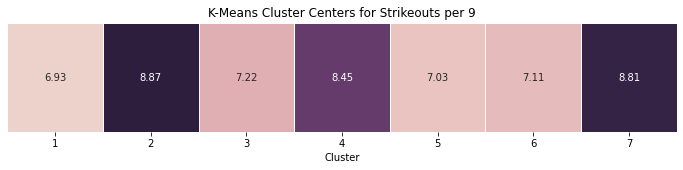

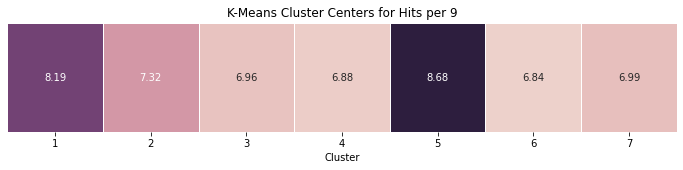

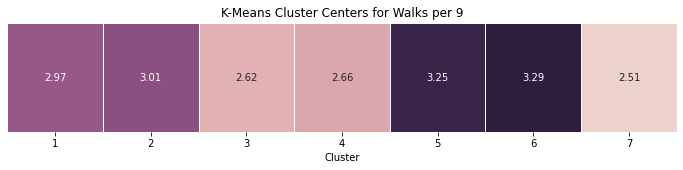

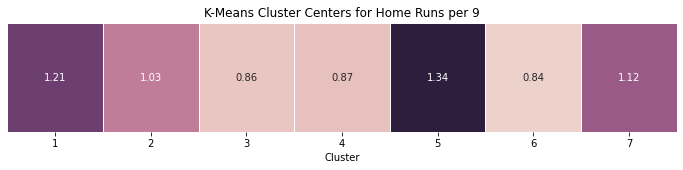

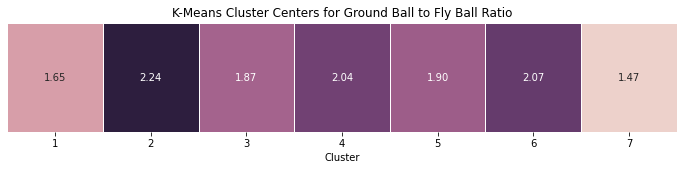

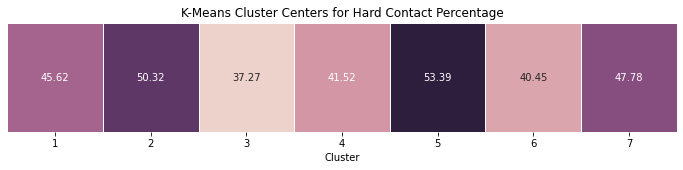

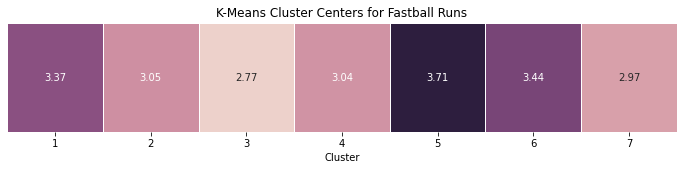

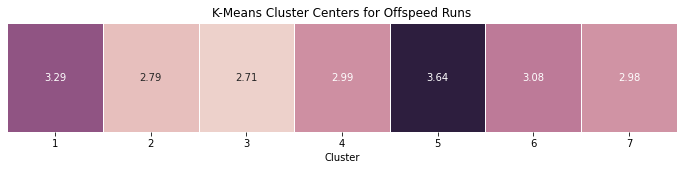

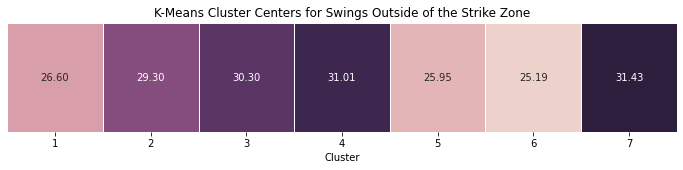

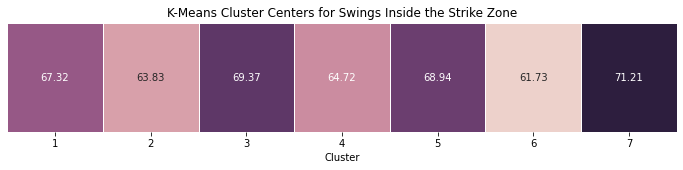

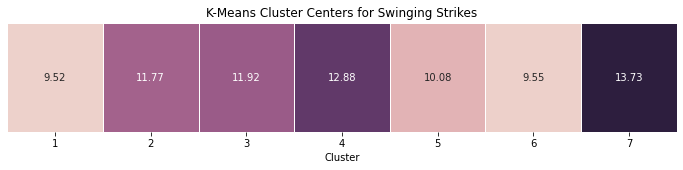

In [10]:
metrics = ['k9', 'h9', 'bb9', 'hr9', 'gb2fb', 'hc_perc', 'fbc', 'osc', 'o_swing', 
            'z_contact', 'ss_perc']
metric_names = ['Strikeouts per 9', 'Hits per 9', 'Walks per 9', 'Home Runs per 9', 
                  'Ground Ball to Fly Ball Ratio', 'Hard Contact Percentage', 'Fastball Runs', 
                  'Offspeed Runs', 'Swings Outside of the Strike Zone', 'Swings Inside the Strike Zone',
                  'Swinging Strikes']

for metric, metric_name in zip(metrics, metric_names):
    cluster_centers = pitchers.groupby('cluster').agg({metric: 'mean'})

    # Plotting
    plt.figure(figsize=(12, 2))
    sns.heatmap(cluster_centers.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), 
                annot=True, fmt='.2f', linewidths=.5, cbar=False, yticklabels=False)
    plt.title('K-Means Cluster Centers for ' + metric_name)
    plt.xlabel('Cluster')
    plt.show()